In [1]:
import numpy as np
import pylab as plt
from scipy import stats

In [2]:
goal = 50                   #kWh, goal for the system to reach
s_avg_cc = 0.3              # as decimal percentage of sky, average cloud cover
s_std_cc = 0.1              # as decimal percentage of sky, standard deviation cloud cover
s_irr = 7                   # kj/m2, solar irradiance
s_area = 100                # m2, solar panel area
ng_power = 70               # kW, natural gas power generation
ng_avg_uptime = 0.95        # as decimal percentage of an hour, average up-time of equipment
ng_std_uptime = 0.01        # as decimal percentage of an hour, standard deviation up-time of equipment
ng_emissions_per_kWh = 0.4127691    # emissions per kWh when an ng turbine is running
ng_startup_time = 4         # hours, time to start-up natural gas turbine
ng_shutdown_time = 2        # hours, time to shutdown natural gas turbine
reward_function = [0,50,100]

In [3]:
# Create Simulation
def simulation(actions):
    reward = []
    for idx, ng_on in enumerate(actions):
        s_kWh = (s_irr * stats.norm.pdf((idx-12)/2.738612788, 0, 1) / \
                stats.norm.pdf((12-12)/2.738612788, 0, 1) ) * \
                (1-np.random.normal(s_avg_cc, s_std_cc, 1)[0]) * s_area
        ng_kWh = ng_on * np.random.normal(ng_avg_uptime, ng_std_uptime,1)[0] * ng_power
        ng_emissions = ng_kWh * ng_emissions_per_kWh
        if s_kWh >= goal and ng_emissions < 1:
            r = reward_function[2]
        elif s_kWh + ng_kWh >= goal:
            r = reward_function[1]
        else:
            r = reward_function[0]
        reward.append(r)
    return reward

# Test Simulation
actions_guess = np.ones(24)
actions_guess *= -1
for i in range(24):
        actions_guess[i] = round(np.random.uniform(0,1),0)
        
actions_guess = [int(a) for a in actions_guess]
rewards = simulation(actions_guess)
print(rewards)

[0, 0, 50, 0, 50, 50, 50, 100, 100, 100, 100, 50, 50, 100, 50, 100, 50, 100, 0, 0, 50, 50, 50, 50]


In [4]:
%%time

import itertools
state_space = list(itertools.product([0, 1], repeat=24))
len(state_space)

Wall time: 3.23 s


16777216

In [5]:
%%time

# takes 29 minutes to run

indexes = []
b = (1,0,0,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[i:i+len(b)] == b:
            indexes.append(idx)

print("finished (1,0,0,0,1)")
b = (1,0,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[i:i+len(b)] == b:
            indexes.append(idx)

print("finished (1,0,0,1)")
b = (1,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[i:i+len(b)] == b:
            indexes.append(idx)
            
print("finished (1,0,1)")
b = (0,1,0)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[i:i+len(b)] == b:
            indexes.append(idx)

print("finished (0,1,0)")
b = (0,0,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[0:i+len(b)] == b:
            indexes.append(idx)
            
print("finished (0,0,0,1)")
b = (0,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[0:i+len(b)] == b:
            indexes.append(idx)

print("finished (0,0,1)")
b = (0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[0:i+len(b)] == b:
            indexes.append(idx)
            
print("finished (0,1)")
b = (1,0)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[0:i+len(b)] == b:
            indexes.append(idx)

print("finished (1,0)")
indexes.sort()
indexes = set(indexes)
indexes = list(indexes)
print('number of invalid states:',len(indexes))
for i in reversed(indexes):
    state_space.pop(i)
    
print('number of valid states',len(state_space))
#state_space

finished (1,0,0,0,1)
finished (1,0,0,1)
finished (1,0,1)
finished (0,1,0)
finished (0,0,0,1)
finished (0,0,1)
finished (0,1)
finished (1,0)
number of invalid states: 16768878
number of valid states 8338
Wall time: 17min 51s


In [6]:
goal_mapping = []
for i in state_space:
    goal_mapping.append(simulation(i))
    
goal_mapping

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  0,
  0,
  0,
  0,
  0,
  50],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  0,
  0,
  0,
  0,
  50,
  50],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  0,
  0,
  0,
  50,
  50,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  0,
  0,
  0,
  50,
  50,
  50],
 [0,
  0,
  0,
  0,
  0,
  0,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  0,
  0,
  50,
  50,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  0,
  0,
  50,


In [7]:
%%time
reward_matrix = []
num_iterations = 3
for i in range(num_iterations):
    reward = []
    for state in state_space:
        reward.append(round(sum(simulation(state)),1))

    reward_matrix.append(reward)

print(np.array(reward_matrix).shape)
print('average winner was:',np.argmax(np.average(reward_matrix,axis=0)),\
      'with simulation:',state_space[np.argmax(np.average(reward_matrix,axis=0))])
for i in range(len(reward_matrix)):
    print('round '+str(i+1),'winner was:',np.argmax(reward_matrix[i]),\
          'with simulation:',state_space[np.argmax(reward_matrix[i])])

(3, 8338)
average winner was: 7622 with simulation: (1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1)
round 1 winner was: 7622 with simulation: (1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1)
round 2 winner was: 6773 with simulation: (1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1)
round 3 winner was: 6767 with simulation: (1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0)
Wall time: 1min 30s


In [8]:
node_counter = 0
state_lookup = {}
for j in range(1,25):
    for i in state_space:
        if 'level'+str(j)+'_'+str(i[:j]) not in state_lookup:
            state_lookup['level'+str(j)+'_'+str(i[:j])] = node_counter
            node_counter += 1


states = []
for i in state_space:
    available_actions = []
    for j in range(1,25):
        available_actions.append(state_lookup['level'+str(j)+'_'+str(i[:j])])
    
    states.append(available_actions)


available_actions = []
term_nodes = [17924]
           
for i in states:
    for j in range(1,25):
        if j == 0:
            if (0,i[j]) not in available_actions:
                available_actions.append((0,i[j]))
        elif j == 24:   
            if (node_counter,0) not in available_actions and (node_counter,1) not in available_actions:
                available_actions.append((node_counter,0))
                available_actions.append((node_counter,1))
            else:
                term_nodes.append(i[-1])
        else:
            if (i[j-1],i[j]) not in available_actions:
                available_actions.append((i[j-1],i[j]))
            
print(available_actions)

[(0, 2), (2, 4), (4, 7), (7, 11), (11, 17), (17, 25), (25, 37), (37, 55), (55, 82), (82, 122), (122, 181), (181, 267), (267, 392), (392, 574), (574, 840), (840, 1230), (1230, 1803), (1803, 2645), (2645, 3881), (3881, 5693), (5693, 8347), (8347, 12233), (12233, 17924), (26262, 0), (26262, 1), (12233, 17925), (8347, 12234), (12234, 17926), (5693, 8348), (8348, 12235), (12235, 17927), (12235, 17928), (3881, 5694), (5694, 8349), (8349, 12236), (12236, 17929), (8349, 12237), (12237, 17930), (12237, 17931), (2645, 3882), (3882, 5695), (5695, 8350), (8350, 12238), (12238, 17932), (5695, 8351), (8351, 12239), (12239, 17933), (8351, 12240), (12240, 17934), (12240, 17935), (1803, 2646), (2646, 3883), (3883, 5696), (5696, 8352), (8352, 12241), (12241, 17936), (3883, 5697), (5697, 8353), (8353, 12242), (12242, 17937), (5697, 8354), (8354, 12243), (12243, 17938), (8354, 12244), (12244, 17939), (12244, 17940), (1230, 1804), (1804, 2647), (2647, 3884), (3884, 5698), (5698, 8355), (8355, 12245), (1224

In [9]:
points_list = available_actions

In [10]:
# how many points in graph? x points
MATRIX_SIZE = node_counter + 1

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [11]:
# assign zeros to paths and 100 to goal-reaching point
reward = -1
for point in points_list:
    print(point)
    for idx, term_node in enumerate(term_nodes):
        if point[0] == term_node or point[1] == term_node:
            reward = sum(goal_mapping[idx])
    
    if point[0] in term_nodes:
        R[point] = reward
    else:
        R[point] = 0

    if point[1] in term_nodes:
        R[point[::-1]] = reward
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
for idx, term_node in enumerate(term_nodes):
    R[term_node,term_node]= sum(goal_mapping[idx])

R

(0, 2)
(2, 4)
(4, 7)
(7, 11)
(11, 17)
(17, 25)
(25, 37)
(37, 55)
(55, 82)
(82, 122)
(122, 181)
(181, 267)
(267, 392)
(392, 574)
(574, 840)
(840, 1230)
(1230, 1803)
(1803, 2645)
(2645, 3881)
(3881, 5693)
(5693, 8347)
(8347, 12233)
(12233, 17924)
(26262, 0)
(26262, 1)
(12233, 17925)
(8347, 12234)
(12234, 17926)
(5693, 8348)
(8348, 12235)
(12235, 17927)
(12235, 17928)
(3881, 5694)
(5694, 8349)
(8349, 12236)
(12236, 17929)
(8349, 12237)
(12237, 17930)
(12237, 17931)
(2645, 3882)
(3882, 5695)
(5695, 8350)
(8350, 12238)
(12238, 17932)
(5695, 8351)
(8351, 12239)
(12239, 17933)
(8351, 12240)
(12240, 17934)
(12240, 17935)
(1803, 2646)
(2646, 3883)
(3883, 5696)
(5696, 8352)
(8352, 12241)
(12241, 17936)
(3883, 5697)
(5697, 8353)
(8353, 12242)
(12242, 17937)
(5697, 8354)
(8354, 12243)
(12243, 17938)
(8354, 12244)
(12244, 17939)
(12244, 17940)
(1230, 1804)
(1804, 2647)
(2647, 3884)
(3884, 5698)
(5698, 8355)
(8355, 12245)
(12245, 17941)
(12245, 17942)
(2647, 3885)
(3885, 5699)
(5699, 8356)
(8356, 12

(12371, 18127)
(12371, 18128)
(3923, 5756)
(5756, 8441)
(8441, 12372)
(12372, 18129)
(8441, 12373)
(12373, 18130)
(12373, 18131)
(2674, 3924)
(3924, 5757)
(5757, 8442)
(8442, 12374)
(12374, 18132)
(5757, 8443)
(8443, 12375)
(12375, 18133)
(8443, 12376)
(12376, 18134)
(12376, 18135)
(581, 851)
(851, 1245)
(1245, 1824)
(1824, 2675)
(2675, 3925)
(3925, 5758)
(5758, 8444)
(8444, 12377)
(12377, 18136)
(12377, 18137)
(8444, 12378)
(12378, 18138)
(5758, 8445)
(8445, 12379)
(12379, 18139)
(12379, 18140)
(3925, 5759)
(5759, 8446)
(8446, 12380)
(12380, 18141)
(8446, 12381)
(12381, 18142)
(12381, 18143)
(851, 1246)
(1246, 1825)
(1825, 2676)
(2676, 3926)
(3926, 5760)
(5760, 8447)
(8447, 12382)
(12382, 18144)
(12382, 18145)
(8447, 12383)
(12383, 18146)
(5760, 8448)
(8448, 12384)
(12384, 18147)
(12384, 18148)
(1246, 1826)
(1826, 2677)
(2677, 3927)
(3927, 5761)
(5761, 8449)
(8449, 12385)
(12385, 18149)
(12385, 18150)
(8449, 12386)
(12386, 18151)
(1826, 2678)
(2678, 3928)
(3928, 5762)
(5762, 8450)
(84

(401, 587)
(587, 859)
(859, 1257)
(1257, 1842)
(1842, 2702)
(2702, 3965)
(3965, 5817)
(5817, 8530)
(8530, 12502)
(12502, 18318)
(12502, 18319)
(8530, 12503)
(12503, 18320)
(5817, 8531)
(8531, 12504)
(12504, 18321)
(12504, 18322)
(3965, 5818)
(5818, 8532)
(8532, 12505)
(12505, 18323)
(8532, 12506)
(12506, 18324)
(12506, 18325)
(2702, 3966)
(3966, 5819)
(5819, 8533)
(8533, 12507)
(12507, 18326)
(5819, 8534)
(8534, 12508)
(12508, 18327)
(8534, 12509)
(12509, 18328)
(12509, 18329)
(1842, 2703)
(2703, 3967)
(3967, 5820)
(5820, 8535)
(8535, 12510)
(12510, 18330)
(3967, 5821)
(5821, 8536)
(8536, 12511)
(12511, 18331)
(5821, 8537)
(8537, 12512)
(12512, 18332)
(8537, 12513)
(12513, 18333)
(12513, 18334)
(1257, 1843)
(1843, 2704)
(2704, 3968)
(3968, 5822)
(5822, 8538)
(8538, 12514)
(12514, 18335)
(12514, 18336)
(2704, 3969)
(3969, 5823)
(5823, 8539)
(8539, 12515)
(12515, 18337)
(3969, 5824)
(5824, 8540)
(8540, 12516)
(12516, 18338)
(5824, 8541)
(8541, 12517)
(12517, 18339)
(8541, 12518)
(12518, 

(12639, 18518)
(2731, 4009)
(4009, 5882)
(5882, 8625)
(8625, 12640)
(12640, 18519)
(4009, 5883)
(5883, 8626)
(8626, 12641)
(12641, 18520)
(5883, 8627)
(8627, 12642)
(12642, 18521)
(8627, 12643)
(12643, 18522)
(12643, 18523)
(867, 1270)
(1270, 1862)
(1862, 2732)
(2732, 4010)
(4010, 5884)
(5884, 8628)
(8628, 12644)
(12644, 18524)
(12644, 18525)
(8628, 12645)
(12645, 18526)
(1862, 2733)
(2733, 4011)
(4011, 5885)
(5885, 8629)
(8629, 12646)
(12646, 18527)
(12646, 18528)
(2733, 4012)
(4012, 5886)
(5886, 8630)
(8630, 12647)
(12647, 18529)
(4012, 5887)
(5887, 8631)
(8631, 12648)
(12648, 18530)
(5887, 8632)
(8632, 12649)
(12649, 18531)
(8632, 12650)
(12650, 18532)
(12650, 18533)
(593, 868)
(868, 1271)
(1271, 1863)
(1863, 2734)
(2734, 4013)
(4013, 5888)
(5888, 8633)
(8633, 12651)
(12651, 18534)
(12651, 18535)
(8633, 12652)
(12652, 18536)
(5888, 8634)
(8634, 12653)
(12653, 18537)
(12653, 18538)
(1271, 1864)
(1864, 2735)
(2735, 4014)
(4014, 5889)
(5889, 8635)
(8635, 12654)
(12654, 18539)
(12654, 1

(12773, 18712)
(4052, 5946)
(5946, 8718)
(8718, 12774)
(12774, 18713)
(8718, 12775)
(12775, 18714)
(12775, 18715)
(876, 1283)
(1283, 1881)
(1881, 2761)
(2761, 4053)
(4053, 5947)
(5947, 8719)
(8719, 12776)
(12776, 18716)
(12776, 18717)
(8719, 12777)
(12777, 18718)
(5947, 8720)
(8720, 12778)
(12778, 18719)
(12778, 18720)
(1283, 1882)
(1882, 2762)
(2762, 4054)
(4054, 5948)
(5948, 8721)
(8721, 12779)
(12779, 18721)
(12779, 18722)
(8721, 12780)
(12780, 18723)
(1882, 2763)
(2763, 4055)
(4055, 5949)
(5949, 8722)
(8722, 12781)
(12781, 18724)
(12781, 18725)
(2763, 4056)
(4056, 5950)
(5950, 8723)
(8723, 12782)
(12782, 18726)
(4056, 5951)
(5951, 8724)
(8724, 12783)
(12783, 18727)
(5951, 8725)
(8725, 12784)
(12784, 18728)
(8725, 12785)
(12785, 18729)
(12785, 18730)
(279, 410)
(410, 600)
(600, 877)
(877, 1284)
(1284, 1883)
(1883, 2764)
(2764, 4057)
(4057, 5952)
(5952, 8726)
(8726, 12786)
(12786, 18731)
(12786, 18732)
(8726, 12787)
(12787, 18733)
(5952, 8727)
(8727, 12788)
(12788, 18734)
(12788, 187

(6013, 8813)
(8813, 12912)
(12912, 18916)
(4100, 6014)
(6014, 8814)
(8814, 12913)
(12913, 18917)
(6014, 8815)
(8815, 12914)
(12914, 18918)
(8815, 12915)
(12915, 18919)
(12915, 18920)
(192, 283)
(283, 414)
(414, 605)
(605, 885)
(885, 1297)
(1297, 1903)
(1903, 2794)
(2794, 4101)
(4101, 6015)
(6015, 8816)
(8816, 12916)
(12916, 18921)
(12916, 18922)
(8816, 12917)
(12917, 18923)
(6015, 8817)
(8817, 12918)
(12918, 18924)
(12918, 18925)
(4101, 6016)
(6016, 8818)
(8818, 12919)
(12919, 18926)
(8818, 12920)
(12920, 18927)
(12920, 18928)
(2794, 4102)
(4102, 6017)
(6017, 8819)
(8819, 12921)
(12921, 18929)
(6017, 8820)
(8820, 12922)
(12922, 18930)
(8820, 12923)
(12923, 18931)
(12923, 18932)
(1903, 2795)
(2795, 4103)
(4103, 6018)
(6018, 8821)
(8821, 12924)
(12924, 18933)
(4103, 6019)
(6019, 8822)
(8822, 12925)
(12925, 18934)
(6019, 8823)
(8823, 12926)
(12926, 18935)
(8823, 12927)
(12927, 18936)
(12927, 18937)
(1297, 1904)
(1904, 2796)
(2796, 4104)
(4104, 6020)
(6020, 8824)
(8824, 12928)
(12928, 1893

(13060, 19133)
(13060, 19134)
(8913, 13061)
(13061, 19135)
(6080, 8914)
(8914, 13062)
(13062, 19136)
(13062, 19137)
(4145, 6081)
(6081, 8915)
(8915, 13063)
(13063, 19138)
(8915, 13064)
(13064, 19139)
(13064, 19140)
(896, 1313)
(1313, 1925)
(1925, 2825)
(2825, 4146)
(4146, 6082)
(6082, 8916)
(8916, 13065)
(13065, 19141)
(13065, 19142)
(8916, 13066)
(13066, 19143)
(6082, 8917)
(8917, 13067)
(13067, 19144)
(13067, 19145)
(1313, 1926)
(1926, 2826)
(2826, 4147)
(4147, 6083)
(6083, 8918)
(8918, 13068)
(13068, 19146)
(13068, 19147)
(8918, 13069)
(13069, 19148)
(1926, 2827)
(2827, 4148)
(4148, 6084)
(6084, 8919)
(8919, 13070)
(13070, 19149)
(13070, 19150)
(2827, 4149)
(4149, 6085)
(6085, 8920)
(8920, 13071)
(13071, 19151)
(4149, 6086)
(6086, 8921)
(8921, 13072)
(13072, 19152)
(6086, 8922)
(8922, 13073)
(13073, 19153)
(8922, 13074)
(13074, 19154)
(13074, 19155)
(39, 59)
(59, 88)
(88, 131)
(131, 194)
(194, 286)
(286, 419)
(419, 613)
(613, 897)
(897, 1314)
(1314, 1927)
(1927, 2828)
(2828, 4150)
(

(9011, 13204)
(13204, 19347)
(4193, 6149)
(6149, 9012)
(9012, 13205)
(13205, 19348)
(6149, 9013)
(9013, 13206)
(13206, 19349)
(9013, 13207)
(13207, 19350)
(13207, 19351)
(1327, 1948)
(1948, 2859)
(2859, 4194)
(4194, 6150)
(6150, 9014)
(9014, 13208)
(13208, 19352)
(13208, 19353)
(2859, 4195)
(4195, 6151)
(6151, 9015)
(9015, 13209)
(13209, 19354)
(4195, 6152)
(6152, 9016)
(9016, 13210)
(13210, 19355)
(6152, 9017)
(9017, 13211)
(13211, 19356)
(9017, 13212)
(13212, 19357)
(13212, 19358)
(905, 1328)
(1328, 1949)
(1949, 2860)
(2860, 4196)
(4196, 6153)
(6153, 9018)
(9018, 13213)
(13213, 19359)
(13213, 19360)
(9018, 13214)
(13214, 19361)
(1949, 2861)
(2861, 4197)
(4197, 6154)
(6154, 9019)
(9019, 13215)
(13215, 19362)
(13215, 19363)
(2861, 4198)
(4198, 6155)
(6155, 9020)
(9020, 13216)
(13216, 19364)
(4198, 6156)
(6156, 9021)
(9021, 13217)
(13217, 19365)
(6156, 9022)
(9022, 13218)
(13218, 19366)
(9022, 13219)
(13219, 19367)
(13219, 19368)
(618, 906)
(906, 1329)
(1329, 1950)
(1950, 2862)
(2862, 4

(9124, 13368)
(13368, 19586)
(13368, 19587)
(9124, 13369)
(13369, 19588)
(6226, 9125)
(9125, 13370)
(13370, 19589)
(13370, 19590)
(1344, 1973)
(1973, 2895)
(2895, 4247)
(4247, 6227)
(6227, 9126)
(9126, 13371)
(13371, 19591)
(13371, 19592)
(9126, 13372)
(13372, 19593)
(1973, 2896)
(2896, 4248)
(4248, 6228)
(6228, 9127)
(9127, 13373)
(13373, 19594)
(13373, 19595)
(2896, 4249)
(4249, 6229)
(6229, 9128)
(9128, 13374)
(13374, 19596)
(4249, 6230)
(6230, 9129)
(9129, 13375)
(13375, 19597)
(6230, 9130)
(9130, 13376)
(13376, 19598)
(9130, 13377)
(13377, 19599)
(13377, 19600)
(198, 292)
(292, 428)
(428, 626)
(626, 917)
(917, 1345)
(1345, 1974)
(1974, 2897)
(2897, 4250)
(4250, 6231)
(6231, 9131)
(9131, 13378)
(13378, 19601)
(13378, 19602)
(9131, 13379)
(13379, 19603)
(6231, 9132)
(9132, 13380)
(13380, 19604)
(13380, 19605)
(4250, 6232)
(6232, 9133)
(9133, 13381)
(13381, 19606)
(9133, 13382)
(13382, 19607)
(13382, 19608)
(2897, 4251)
(4251, 6233)
(6233, 9134)
(9134, 13383)
(13383, 19609)
(6233, 91

(2926, 4292)
(4292, 6293)
(6293, 9223)
(9223, 13514)
(13514, 19801)
(13514, 19802)
(9223, 13515)
(13515, 19803)
(6293, 9224)
(9224, 13516)
(13516, 19804)
(13516, 19805)
(4292, 6294)
(6294, 9225)
(9225, 13517)
(13517, 19806)
(9225, 13518)
(13518, 19807)
(13518, 19808)
(2926, 4293)
(4293, 6295)
(6295, 9226)
(9226, 13519)
(13519, 19809)
(6295, 9227)
(9227, 13520)
(13520, 19810)
(9227, 13521)
(13521, 19811)
(13521, 19812)
(633, 928)
(928, 1360)
(1360, 1995)
(1995, 2927)
(2927, 4294)
(4294, 6296)
(6296, 9228)
(9228, 13522)
(13522, 19813)
(13522, 19814)
(9228, 13523)
(13523, 19815)
(6296, 9229)
(9229, 13524)
(13524, 19816)
(13524, 19817)
(4294, 6297)
(6297, 9230)
(9230, 13525)
(13525, 19818)
(9230, 13526)
(13526, 19819)
(13526, 19820)
(928, 1361)
(1361, 1996)
(1996, 2928)
(2928, 4295)
(4295, 6298)
(6298, 9231)
(9231, 13527)
(13527, 19821)
(13527, 19822)
(9231, 13528)
(13528, 19823)
(6298, 9232)
(9232, 13529)
(13529, 19824)
(13529, 19825)
(1361, 1997)
(1997, 2929)
(2929, 4296)
(4296, 6299)
(6

(13662, 20021)
(2017, 2959)
(2959, 4339)
(4339, 6361)
(6361, 9323)
(9323, 13663)
(13663, 20022)
(13663, 20023)
(2959, 4340)
(4340, 6362)
(6362, 9324)
(9324, 13664)
(13664, 20024)
(4340, 6363)
(6363, 9325)
(9325, 13665)
(13665, 20025)
(6363, 9326)
(9326, 13666)
(13666, 20026)
(9326, 13667)
(13667, 20027)
(13667, 20028)
(639, 938)
(938, 1376)
(1376, 2018)
(2018, 2960)
(2960, 4341)
(4341, 6364)
(6364, 9327)
(9327, 13668)
(13668, 20029)
(13668, 20030)
(9327, 13669)
(13669, 20031)
(6364, 9328)
(9328, 13670)
(13670, 20032)
(13670, 20033)
(1376, 2019)
(2019, 2961)
(2961, 4342)
(4342, 6365)
(6365, 9329)
(9329, 13671)
(13671, 20034)
(13671, 20035)
(9329, 13672)
(13672, 20036)
(2019, 2962)
(2962, 4343)
(4343, 6366)
(6366, 9330)
(9330, 13673)
(13673, 20037)
(13673, 20038)
(2962, 4344)
(4344, 6367)
(6367, 9331)
(9331, 13674)
(13674, 20039)
(4344, 6368)
(6368, 9332)
(9332, 13675)
(13675, 20040)
(6368, 9333)
(9333, 13676)
(13676, 20041)
(9333, 13677)
(13677, 20042)
(13677, 20043)
(436, 640)
(640, 93

(2988, 4382)
(4382, 6424)
(6424, 9415)
(9415, 13796)
(13796, 20216)
(13796, 20217)
(9415, 13797)
(13797, 20218)
(2037, 2989)
(2989, 4383)
(4383, 6425)
(6425, 9416)
(9416, 13798)
(13798, 20219)
(13798, 20220)
(2989, 4384)
(4384, 6426)
(6426, 9417)
(9417, 13799)
(13799, 20221)
(4384, 6427)
(6427, 9418)
(9418, 13800)
(13800, 20222)
(6427, 9419)
(9419, 13801)
(13801, 20223)
(9419, 13802)
(13802, 20224)
(13802, 20225)
(7, 12)
(12, 19)
(19, 28)
(28, 42)
(42, 63)
(63, 94)
(94, 139)
(139, 205)
(205, 301)
(301, 441)
(441, 646)
(646, 947)
(947, 1389)
(1389, 2038)
(2038, 2990)
(2990, 4385)
(4385, 6428)
(6428, 9420)
(9420, 13803)
(13803, 20226)
(13803, 20227)
(9420, 13804)
(13804, 20228)
(6428, 9421)
(9421, 13805)
(13805, 20229)
(13805, 20230)
(4385, 6429)
(6429, 9422)
(9422, 13806)
(13806, 20231)
(9422, 13807)
(13807, 20232)
(13807, 20233)
(2990, 4386)
(4386, 6430)
(6430, 9423)
(9423, 13808)
(13808, 20234)
(6430, 9424)
(9424, 13809)
(13809, 20235)
(9424, 13810)
(13810, 20236)
(13810, 20237)
(2038

(4426, 6489)
(6489, 9510)
(9510, 13936)
(13936, 20422)
(6489, 9511)
(9511, 13937)
(13937, 20423)
(9511, 13938)
(13938, 20424)
(13938, 20425)
(445, 653)
(653, 957)
(957, 1403)
(1403, 2058)
(2058, 3019)
(3019, 4427)
(4427, 6490)
(6490, 9512)
(9512, 13939)
(13939, 20426)
(13939, 20427)
(9512, 13940)
(13940, 20428)
(6490, 9513)
(9513, 13941)
(13941, 20429)
(13941, 20430)
(4427, 6491)
(6491, 9514)
(9514, 13942)
(13942, 20431)
(9514, 13943)
(13943, 20432)
(13943, 20433)
(3019, 4428)
(4428, 6492)
(6492, 9515)
(9515, 13944)
(13944, 20434)
(6492, 9516)
(9516, 13945)
(13945, 20435)
(9516, 13946)
(13946, 20436)
(13946, 20437)
(653, 958)
(958, 1404)
(1404, 2059)
(2059, 3020)
(3020, 4429)
(4429, 6493)
(6493, 9517)
(9517, 13947)
(13947, 20438)
(13947, 20439)
(9517, 13948)
(13948, 20440)
(6493, 9518)
(9518, 13949)
(13949, 20441)
(13949, 20442)
(4429, 6494)
(6494, 9519)
(9519, 13950)
(13950, 20443)
(9519, 13951)
(13951, 20444)
(13951, 20445)
(958, 1405)
(1405, 2060)
(2060, 3021)
(3021, 4430)
(4430, 64

(4469, 6553)
(6553, 9605)
(9605, 14075)
(14075, 20625)
(9605, 14076)
(14076, 20626)
(14076, 20627)
(966, 1417)
(1417, 2078)
(2078, 3048)
(3048, 4470)
(4470, 6554)
(6554, 9606)
(9606, 14077)
(14077, 20628)
(14077, 20629)
(9606, 14078)
(14078, 20630)
(6554, 9607)
(9607, 14079)
(14079, 20631)
(14079, 20632)
(1417, 2079)
(2079, 3049)
(3049, 4471)
(4471, 6555)
(6555, 9608)
(9608, 14080)
(14080, 20633)
(14080, 20634)
(9608, 14081)
(14081, 20635)
(2079, 3050)
(3050, 4472)
(4472, 6556)
(6556, 9609)
(9609, 14082)
(14082, 20636)
(14082, 20637)
(3050, 4473)
(4473, 6557)
(6557, 9610)
(9610, 14083)
(14083, 20638)
(4473, 6558)
(6558, 9611)
(9611, 14084)
(14084, 20639)
(6558, 9612)
(9612, 14085)
(14085, 20640)
(9612, 14086)
(14086, 20641)
(14086, 20642)
(306, 450)
(450, 660)
(660, 967)
(967, 1418)
(1418, 2080)
(2080, 3051)
(3051, 4474)
(4474, 6559)
(6559, 9613)
(9613, 14087)
(14087, 20643)
(14087, 20644)
(9613, 14088)
(14088, 20645)
(6559, 9614)
(9614, 14089)
(14089, 20646)
(14089, 20647)
(4474, 6560

(977, 1432)
(1432, 2099)
(2099, 3078)
(3078, 4514)
(4514, 6619)
(6619, 9703)
(9703, 14221)
(14221, 20840)
(14221, 20841)
(9703, 14222)
(14222, 20842)
(6619, 9704)
(9704, 14223)
(14223, 20843)
(14223, 20844)
(1432, 2100)
(2100, 3079)
(3079, 4515)
(4515, 6620)
(6620, 9705)
(9705, 14224)
(14224, 20845)
(14224, 20846)
(9705, 14225)
(14225, 20847)
(2100, 3080)
(3080, 4516)
(4516, 6621)
(6621, 9706)
(9706, 14226)
(14226, 20848)
(14226, 20849)
(3080, 4517)
(4517, 6622)
(6622, 9707)
(9707, 14227)
(14227, 20850)
(4517, 6623)
(6623, 9708)
(9708, 14228)
(14228, 20851)
(6623, 9709)
(9709, 14229)
(14229, 20852)
(9709, 14230)
(14230, 20853)
(14230, 20854)
(454, 667)
(667, 978)
(978, 1433)
(1433, 2101)
(2101, 3081)
(3081, 4518)
(4518, 6624)
(6624, 9710)
(9710, 14231)
(14231, 20855)
(14231, 20856)
(9710, 14232)
(14232, 20857)
(6624, 9711)
(9711, 14233)
(14233, 20858)
(14233, 20859)
(4518, 6625)
(6625, 9712)
(9712, 14234)
(14234, 20860)
(9712, 14235)
(14235, 20861)
(14235, 20862)
(978, 1434)
(1434, 210

(9797, 14362)
(14362, 21051)
(6683, 9798)
(9798, 14363)
(14363, 21052)
(14363, 21053)
(4559, 6684)
(6684, 9799)
(9799, 14364)
(14364, 21054)
(9799, 14365)
(14365, 21055)
(14365, 21056)
(988, 1449)
(1449, 2123)
(2123, 3111)
(3111, 4560)
(4560, 6685)
(6685, 9800)
(9800, 14366)
(14366, 21057)
(14366, 21058)
(9800, 14367)
(14367, 21059)
(6685, 9801)
(9801, 14368)
(14368, 21060)
(14368, 21061)
(1449, 2124)
(2124, 3112)
(3112, 4561)
(4561, 6686)
(6686, 9802)
(9802, 14369)
(14369, 21062)
(14369, 21063)
(9802, 14370)
(14370, 21064)
(2124, 3113)
(3113, 4562)
(4562, 6687)
(6687, 9803)
(9803, 14371)
(14371, 21065)
(14371, 21066)
(3113, 4563)
(4563, 6688)
(6688, 9804)
(9804, 14372)
(14372, 21067)
(4563, 6689)
(6689, 9805)
(9805, 14373)
(14373, 21068)
(6689, 9806)
(9806, 14374)
(14374, 21069)
(9806, 14375)
(14375, 21070)
(14375, 21071)
(66, 98)
(98, 144)
(144, 212)
(212, 312)
(312, 459)
(459, 674)
(674, 989)
(989, 1450)
(1450, 2125)
(2125, 3114)
(3114, 4564)
(4564, 6690)
(6690, 9807)
(9807, 14376)


(14506, 21260)
(9898, 14507)
(14507, 21261)
(14507, 21262)
(2143, 3143)
(3143, 4608)
(4608, 6754)
(6754, 9899)
(9899, 14508)
(14508, 21263)
(4608, 6755)
(6755, 9900)
(9900, 14509)
(14509, 21264)
(6755, 9901)
(9901, 14510)
(14510, 21265)
(9901, 14511)
(14511, 21266)
(14511, 21267)
(463, 680)
(680, 997)
(997, 1462)
(1462, 2144)
(2144, 3144)
(3144, 4609)
(4609, 6756)
(6756, 9902)
(9902, 14512)
(14512, 21268)
(14512, 21269)
(9902, 14513)
(14513, 21270)
(6756, 9903)
(9903, 14514)
(14514, 21271)
(14514, 21272)
(4609, 6757)
(6757, 9904)
(9904, 14515)
(14515, 21273)
(9904, 14516)
(14516, 21274)
(14516, 21275)
(3144, 4610)
(4610, 6758)
(6758, 9905)
(9905, 14517)
(14517, 21276)
(6758, 9906)
(9906, 14518)
(14518, 21277)
(9906, 14519)
(14519, 21278)
(14519, 21279)
(680, 998)
(998, 1463)
(1463, 2145)
(2145, 3145)
(3145, 4611)
(4611, 6759)
(6759, 9907)
(9907, 14520)
(14520, 21280)
(14520, 21281)
(9907, 14521)
(14521, 21282)
(6759, 9908)
(9908, 14522)
(14522, 21283)
(14522, 21284)
(4611, 6760)
(6760,

(2166, 3175)
(3175, 4653)
(4653, 6820)
(6820, 9997)
(9997, 14654)
(14654, 21479)
(14654, 21480)
(3175, 4654)
(4654, 6821)
(6821, 9998)
(9998, 14655)
(14655, 21481)
(4654, 6822)
(6822, 9999)
(9999, 14656)
(14656, 21482)
(6822, 10000)
(10000, 14657)
(14657, 21483)
(10000, 14658)
(14658, 21484)
(14658, 21485)
(318, 468)
(468, 687)
(687, 1008)
(1008, 1478)
(1478, 2167)
(2167, 3176)
(3176, 4655)
(4655, 6823)
(6823, 10001)
(10001, 14659)
(14659, 21486)
(14659, 21487)
(10001, 14660)
(14660, 21488)
(6823, 10002)
(10002, 14661)
(14661, 21489)
(14661, 21490)
(4655, 6824)
(6824, 10003)
(10003, 14662)
(14662, 21491)
(10003, 14663)
(14663, 21492)
(14663, 21493)
(3176, 4656)
(4656, 6825)
(6825, 10004)
(10004, 14664)
(14664, 21494)
(6825, 10005)
(10005, 14665)
(14665, 21495)
(10005, 14666)
(14666, 21496)
(14666, 21497)
(2167, 3177)
(3177, 4657)
(4657, 6826)
(6826, 10006)
(10006, 14667)
(14667, 21498)
(4657, 6827)
(6827, 10007)
(10007, 14668)
(14668, 21499)
(6827, 10008)
(10008, 14669)
(14669, 21500)


(14785, 21669)
(10087, 14786)
(14786, 21670)
(14786, 21671)
(1016, 1490)
(1490, 2184)
(2184, 3201)
(3201, 4693)
(4693, 6881)
(6881, 10088)
(10088, 14787)
(14787, 21672)
(14787, 21673)
(10088, 14788)
(14788, 21674)
(2184, 3202)
(3202, 4694)
(4694, 6882)
(6882, 10089)
(10089, 14789)
(14789, 21675)
(14789, 21676)
(3202, 4695)
(4695, 6883)
(6883, 10090)
(10090, 14790)
(14790, 21677)
(4695, 6884)
(6884, 10091)
(10091, 14791)
(14791, 21678)
(6884, 10092)
(10092, 14792)
(14792, 21679)
(10092, 14793)
(14793, 21680)
(14793, 21681)
(693, 1017)
(1017, 1491)
(1491, 2185)
(2185, 3203)
(3203, 4696)
(4696, 6885)
(6885, 10093)
(10093, 14794)
(14794, 21682)
(14794, 21683)
(10093, 14795)
(14795, 21684)
(6885, 10094)
(10094, 14796)
(14796, 21685)
(14796, 21686)
(1491, 2186)
(2186, 3204)
(3204, 4697)
(4697, 6886)
(6886, 10095)
(10095, 14797)
(14797, 21687)
(14797, 21688)
(10095, 14798)
(14798, 21689)
(2186, 3205)
(3205, 4698)
(4698, 6887)
(6887, 10096)
(10096, 14799)
(14799, 21690)
(14799, 21691)
(3205, 4

(10175, 14912)
(14912, 21853)
(10175, 14913)
(14913, 21854)
(14913, 21855)
(476, 699)
(699, 1025)
(1025, 1502)
(1502, 2202)
(2202, 3229)
(3229, 4735)
(4735, 6942)
(6942, 10176)
(10176, 14914)
(14914, 21856)
(14914, 21857)
(10176, 14915)
(14915, 21858)
(6942, 10177)
(10177, 14916)
(14916, 21859)
(14916, 21860)
(4735, 6943)
(6943, 10178)
(10178, 14917)
(14917, 21861)
(10178, 14918)
(14918, 21862)
(14918, 21863)
(1025, 1503)
(1503, 2203)
(2203, 3230)
(3230, 4736)
(4736, 6944)
(6944, 10179)
(10179, 14919)
(14919, 21864)
(14919, 21865)
(10179, 14920)
(14920, 21866)
(6944, 10180)
(10180, 14921)
(14921, 21867)
(14921, 21868)
(1503, 2204)
(2204, 3231)
(3231, 4737)
(4737, 6945)
(6945, 10181)
(10181, 14922)
(14922, 21869)
(14922, 21870)
(10181, 14923)
(14923, 21871)
(2204, 3232)
(3232, 4738)
(4738, 6946)
(6946, 10182)
(10182, 14924)
(14924, 21872)
(14924, 21873)
(3232, 4739)
(4739, 6947)
(6947, 10183)
(10183, 14925)
(14925, 21874)
(4739, 6948)
(6948, 10184)
(10184, 14926)
(14926, 21875)
(6948, 1

(15049, 22052)
(10269, 15050)
(15050, 22053)
(15050, 22054)
(1514, 2221)
(2221, 3258)
(3258, 4778)
(4778, 7006)
(7006, 10270)
(10270, 15051)
(15051, 22055)
(15051, 22056)
(3258, 4779)
(4779, 7007)
(7007, 10271)
(10271, 15052)
(15052, 22057)
(4779, 7008)
(7008, 10272)
(10272, 15053)
(15053, 22058)
(7008, 10273)
(10273, 15054)
(15054, 22059)
(10273, 15055)
(15055, 22060)
(15055, 22061)
(1033, 1515)
(1515, 2222)
(2222, 3259)
(3259, 4780)
(4780, 7009)
(7009, 10274)
(10274, 15056)
(15056, 22062)
(15056, 22063)
(10274, 15057)
(15057, 22064)
(2222, 3260)
(3260, 4781)
(4781, 7010)
(7010, 10275)
(10275, 15058)
(15058, 22065)
(15058, 22066)
(3260, 4782)
(4782, 7011)
(7011, 10276)
(10276, 15059)
(15059, 22067)
(4782, 7012)
(7012, 10277)
(10277, 15060)
(15060, 22068)
(7012, 10278)
(10278, 15061)
(15061, 22069)
(10278, 15062)
(15062, 22070)
(15062, 22071)
(705, 1034)
(1034, 1516)
(1516, 2223)
(2223, 3261)
(3261, 4783)
(4783, 7013)
(7013, 10279)
(10279, 15063)
(15063, 22072)
(15063, 22073)
(10279, 1

(15181, 22247)
(7070, 10361)
(10361, 15182)
(15182, 22248)
(10361, 15183)
(15183, 22249)
(15183, 22250)
(710, 1042)
(1042, 1529)
(1529, 2243)
(2243, 3290)
(3290, 4824)
(4824, 7071)
(7071, 10362)
(10362, 15184)
(15184, 22251)
(15184, 22252)
(10362, 15185)
(15185, 22253)
(7071, 10363)
(10363, 15186)
(15186, 22254)
(15186, 22255)
(1529, 2244)
(2244, 3291)
(3291, 4825)
(4825, 7072)
(7072, 10364)
(10364, 15187)
(15187, 22256)
(15187, 22257)
(10364, 15188)
(15188, 22258)
(2244, 3292)
(3292, 4826)
(4826, 7073)
(7073, 10365)
(10365, 15189)
(15189, 22259)
(15189, 22260)
(3292, 4827)
(4827, 7074)
(7074, 10366)
(10366, 15190)
(15190, 22261)
(4827, 7075)
(7075, 10367)
(10367, 15191)
(15191, 22262)
(7075, 10368)
(10368, 15192)
(15192, 22263)
(10368, 15193)
(15193, 22264)
(15193, 22265)
(153, 226)
(226, 331)
(331, 485)
(485, 711)
(711, 1043)
(1043, 1530)
(1530, 2245)
(2245, 3293)
(3293, 4828)
(4828, 7076)
(7076, 10369)
(10369, 15194)
(15194, 22266)
(15194, 22267)
(10369, 15195)
(15195, 22268)
(7076,

(3317, 4864)
(4864, 7130)
(7130, 10448)
(10448, 15309)
(15309, 22433)
(15309, 22434)
(10448, 15310)
(15310, 22435)
(7130, 10449)
(10449, 15311)
(15311, 22436)
(15311, 22437)
(1541, 2262)
(2262, 3318)
(3318, 4865)
(4865, 7131)
(7131, 10450)
(10450, 15312)
(15312, 22438)
(15312, 22439)
(10450, 15313)
(15313, 22440)
(2262, 3319)
(3319, 4866)
(4866, 7132)
(7132, 10451)
(10451, 15314)
(15314, 22441)
(15314, 22442)
(3319, 4867)
(4867, 7133)
(7133, 10452)
(10452, 15315)
(15315, 22443)
(4867, 7134)
(7134, 10453)
(10453, 15316)
(15316, 22444)
(7134, 10454)
(10454, 15317)
(15317, 22445)
(10454, 15318)
(15318, 22446)
(15318, 22447)
(333, 489)
(489, 717)
(717, 1051)
(1051, 1542)
(1542, 2263)
(2263, 3320)
(3320, 4868)
(4868, 7135)
(7135, 10455)
(10455, 15319)
(15319, 22448)
(15319, 22449)
(10455, 15320)
(15320, 22450)
(7135, 10456)
(10456, 15321)
(15321, 22451)
(15321, 22452)
(4868, 7136)
(7136, 10457)
(10457, 15322)
(15322, 22453)
(10457, 15323)
(15323, 22454)
(15323, 22455)
(3320, 4869)
(4869, 71

(15442, 22633)
(10537, 15443)
(15443, 22634)
(2283, 3348)
(3348, 4907)
(4907, 7191)
(7191, 10538)
(10538, 15444)
(15444, 22635)
(15444, 22636)
(3348, 4908)
(4908, 7192)
(7192, 10539)
(10539, 15445)
(15445, 22637)
(4908, 7193)
(7193, 10540)
(10540, 15446)
(15446, 22638)
(7193, 10541)
(10541, 15447)
(15447, 22639)
(10541, 15448)
(15448, 22640)
(15448, 22641)
(71, 106)
(106, 156)
(156, 229)
(229, 336)
(336, 493)
(493, 723)
(723, 1061)
(1061, 1557)
(1557, 2284)
(2284, 3349)
(3349, 4909)
(4909, 7194)
(7194, 10542)
(10542, 15449)
(15449, 22642)
(15449, 22643)
(10542, 15450)
(15450, 22644)
(7194, 10543)
(10543, 15451)
(15451, 22645)
(15451, 22646)
(4909, 7195)
(7195, 10544)
(10544, 15452)
(15452, 22647)
(10544, 15453)
(15453, 22648)
(15453, 22649)
(3349, 4910)
(4910, 7196)
(7196, 10545)
(10545, 15454)
(15454, 22650)
(7196, 10546)
(10546, 15455)
(15455, 22651)
(10546, 15456)
(15456, 22652)
(15456, 22653)
(2284, 3350)
(3350, 4911)
(4911, 7197)
(7197, 10547)
(10547, 15457)
(15457, 22654)
(4911, 

(3379, 4954)
(4954, 7260)
(7260, 10637)
(10637, 15585)
(15585, 22838)
(15585, 22839)
(10637, 15586)
(15586, 22840)
(7260, 10638)
(10638, 15587)
(15587, 22841)
(15587, 22842)
(4954, 7261)
(7261, 10639)
(10639, 15588)
(15588, 22843)
(10639, 15589)
(15589, 22844)
(15589, 22845)
(3379, 4955)
(4955, 7262)
(7262, 10640)
(10640, 15590)
(15590, 22846)
(7262, 10641)
(10641, 15591)
(15591, 22847)
(10641, 15592)
(15592, 22848)
(15592, 22849)
(729, 1070)
(1070, 1570)
(1570, 2304)
(2304, 3380)
(3380, 4956)
(4956, 7263)
(7263, 10642)
(10642, 15593)
(15593, 22850)
(15593, 22851)
(10642, 15594)
(15594, 22852)
(7263, 10643)
(10643, 15595)
(15595, 22853)
(15595, 22854)
(4956, 7264)
(7264, 10644)
(10644, 15596)
(15596, 22855)
(10644, 15597)
(15597, 22856)
(15597, 22857)
(1070, 1571)
(1571, 2305)
(2305, 3381)
(3381, 4957)
(4957, 7265)
(7265, 10645)
(10645, 15598)
(15598, 22858)
(15598, 22859)
(10645, 15599)
(15599, 22860)
(7265, 10646)
(10646, 15600)
(15600, 22861)
(15600, 22862)
(1571, 2306)
(2306, 3382)

(1082, 1587)
(1587, 2328)
(2328, 3414)
(3414, 5005)
(5005, 7335)
(7335, 10749)
(10749, 15752)
(15752, 23085)
(15752, 23086)
(10749, 15753)
(15753, 23087)
(7335, 10750)
(10750, 15754)
(15754, 23088)
(15754, 23089)
(5005, 7336)
(7336, 10751)
(10751, 15755)
(15755, 23090)
(10751, 15756)
(15756, 23091)
(15756, 23092)
(1082, 1588)
(1588, 2329)
(2329, 3415)
(3415, 5006)
(5006, 7337)
(7337, 10752)
(10752, 15757)
(15757, 23093)
(15757, 23094)
(10752, 15758)
(15758, 23095)
(7337, 10753)
(10753, 15759)
(15759, 23096)
(15759, 23097)
(1588, 2330)
(2330, 3416)
(3416, 5007)
(5007, 7338)
(7338, 10754)
(10754, 15760)
(15760, 23098)
(15760, 23099)
(10754, 15761)
(15761, 23100)
(2330, 3417)
(3417, 5008)
(5008, 7339)
(7339, 10755)
(10755, 15762)
(15762, 23101)
(15762, 23102)
(3417, 5009)
(5009, 7340)
(7340, 10756)
(10756, 15763)
(15763, 23103)
(5009, 7341)
(7341, 10757)
(10757, 15764)
(15764, 23104)
(7341, 10758)
(10758, 15765)
(15765, 23105)
(10758, 15766)
(15766, 23106)
(15766, 23107)
(107, 159)
(159, 

(1599, 2347)
(2347, 3443)
(3443, 5048)
(5048, 7399)
(7399, 10843)
(10843, 15889)
(15889, 23284)
(15889, 23285)
(3443, 5049)
(5049, 7400)
(7400, 10844)
(10844, 15890)
(15890, 23286)
(5049, 7401)
(7401, 10845)
(10845, 15891)
(15891, 23287)
(7401, 10846)
(10846, 15892)
(15892, 23288)
(10846, 15893)
(15893, 23289)
(15893, 23290)
(1090, 1600)
(1600, 2348)
(2348, 3444)
(3444, 5050)
(5050, 7402)
(7402, 10847)
(10847, 15894)
(15894, 23291)
(15894, 23292)
(10847, 15895)
(15895, 23293)
(2348, 3445)
(3445, 5051)
(5051, 7403)
(7403, 10848)
(10848, 15896)
(15896, 23294)
(15896, 23295)
(3445, 5052)
(5052, 7404)
(7404, 10849)
(10849, 15897)
(15897, 23296)
(5052, 7405)
(7405, 10850)
(10850, 15898)
(15898, 23297)
(7405, 10851)
(10851, 15899)
(15899, 23298)
(10851, 15900)
(15900, 23299)
(15900, 23300)
(236, 347)
(347, 508)
(508, 744)
(744, 1091)
(1091, 1601)
(1601, 2349)
(2349, 3446)
(3446, 5053)
(5053, 7406)
(7406, 10852)
(10852, 15901)
(15901, 23301)
(15901, 23302)
(10852, 15902)
(15902, 23303)
(7406,

(10932, 16018)
(16018, 23471)
(16018, 23472)
(1098, 1612)
(1612, 2366)
(2366, 3471)
(3471, 5090)
(5090, 7461)
(7461, 10933)
(10933, 16019)
(16019, 23473)
(16019, 23474)
(10933, 16020)
(16020, 23475)
(2366, 3472)
(3472, 5091)
(5091, 7462)
(7462, 10934)
(10934, 16021)
(16021, 23476)
(16021, 23477)
(3472, 5092)
(5092, 7463)
(7463, 10935)
(10935, 16022)
(16022, 23478)
(5092, 7464)
(7464, 10936)
(10936, 16023)
(16023, 23479)
(7464, 10937)
(10937, 16024)
(16024, 23480)
(10937, 16025)
(16025, 23481)
(16025, 23482)
(749, 1099)
(1099, 1613)
(1613, 2367)
(2367, 3473)
(3473, 5093)
(5093, 7465)
(7465, 10938)
(10938, 16026)
(16026, 23483)
(16026, 23484)
(10938, 16027)
(16027, 23485)
(7465, 10939)
(10939, 16028)
(16028, 23486)
(16028, 23487)
(1613, 2368)
(2368, 3474)
(3474, 5094)
(5094, 7466)
(7466, 10940)
(10940, 16029)
(16029, 23488)
(16029, 23489)
(10940, 16030)
(16030, 23490)
(2368, 3475)
(3475, 5095)
(5095, 7467)
(7467, 10941)
(10941, 16031)
(16031, 23491)
(16031, 23492)
(3475, 5096)
(5096, 746

(16159, 23677)
(11030, 16160)
(16160, 23678)
(16160, 23679)
(352, 516)
(516, 756)
(756, 1108)
(1108, 1626)
(1626, 2387)
(2387, 3503)
(3503, 5137)
(5137, 7529)
(7529, 11031)
(11031, 16161)
(16161, 23680)
(16161, 23681)
(11031, 16162)
(16162, 23682)
(7529, 11032)
(11032, 16163)
(16163, 23683)
(16163, 23684)
(5137, 7530)
(7530, 11033)
(11033, 16164)
(16164, 23685)
(11033, 16165)
(16165, 23686)
(16165, 23687)
(3503, 5138)
(5138, 7531)
(7531, 11034)
(11034, 16166)
(16166, 23688)
(7531, 11035)
(11035, 16167)
(16167, 23689)
(11035, 16168)
(16168, 23690)
(16168, 23691)
(756, 1109)
(1109, 1627)
(1627, 2388)
(2388, 3504)
(3504, 5139)
(5139, 7532)
(7532, 11036)
(11036, 16169)
(16169, 23692)
(16169, 23693)
(11036, 16170)
(16170, 23694)
(7532, 11037)
(11037, 16171)
(16171, 23695)
(16171, 23696)
(5139, 7533)
(7533, 11038)
(11038, 16172)
(16172, 23697)
(11038, 16173)
(16173, 23698)
(16173, 23699)
(1109, 1628)
(1628, 2389)
(2389, 3505)
(3505, 5140)
(5140, 7534)
(7534, 11039)
(11039, 16174)
(16174, 237

(11124, 16296)
(16296, 23878)
(7594, 11125)
(11125, 16297)
(16297, 23879)
(11125, 16298)
(16298, 23880)
(16298, 23881)
(2407, 3534)
(3534, 5183)
(5183, 7595)
(7595, 11126)
(11126, 16299)
(16299, 23882)
(5183, 7596)
(7596, 11127)
(11127, 16300)
(16300, 23883)
(7596, 11128)
(11128, 16301)
(16301, 23884)
(11128, 16302)
(16302, 23885)
(16302, 23886)
(1639, 2408)
(2408, 3535)
(3535, 5184)
(5184, 7597)
(7597, 11129)
(11129, 16303)
(16303, 23887)
(16303, 23888)
(3535, 5185)
(5185, 7598)
(7598, 11130)
(11130, 16304)
(16304, 23889)
(5185, 7599)
(7599, 11131)
(11131, 16305)
(16305, 23890)
(7599, 11132)
(11132, 16306)
(16306, 23891)
(11132, 16307)
(16307, 23892)
(16307, 23893)
(356, 521)
(521, 762)
(762, 1117)
(1117, 1640)
(1640, 2409)
(2409, 3536)
(3536, 5186)
(5186, 7600)
(7600, 11133)
(11133, 16308)
(16308, 23894)
(16308, 23895)
(11133, 16309)
(16309, 23896)
(7600, 11134)
(11134, 16310)
(16310, 23897)
(16310, 23898)
(5186, 7601)
(7601, 11135)
(11135, 16311)
(16311, 23899)
(11135, 16312)
(16312

(11218, 16436)
(16436, 24084)
(7657, 11219)
(11219, 16437)
(16437, 24085)
(16437, 24086)
(5225, 7658)
(7658, 11220)
(11220, 16438)
(16438, 24087)
(11220, 16439)
(16439, 24088)
(16439, 24089)
(1127, 1655)
(1655, 2429)
(2429, 3564)
(3564, 5226)
(5226, 7659)
(7659, 11221)
(11221, 16440)
(16440, 24090)
(16440, 24091)
(11221, 16441)
(16441, 24092)
(7659, 11222)
(11222, 16442)
(16442, 24093)
(16442, 24094)
(1655, 2430)
(2430, 3565)
(3565, 5227)
(5227, 7660)
(7660, 11223)
(11223, 16443)
(16443, 24095)
(16443, 24096)
(11223, 16444)
(16444, 24097)
(2430, 3566)
(3566, 5228)
(5228, 7661)
(7661, 11224)
(11224, 16445)
(16445, 24098)
(16445, 24099)
(3566, 5229)
(5229, 7662)
(7662, 11225)
(11225, 16446)
(16446, 24100)
(5229, 7663)
(7663, 11226)
(11226, 16447)
(16447, 24101)
(7663, 11227)
(11227, 16448)
(16448, 24102)
(11227, 16449)
(16449, 24103)
(16449, 24104)
(166, 245)
(245, 359)
(359, 525)
(525, 769)
(769, 1128)
(1128, 1656)
(1656, 2431)
(2431, 3567)
(3567, 5230)
(5230, 7664)
(7664, 11228)
(11228

(16571, 24281)
(16571, 24282)
(11310, 16572)
(16572, 24283)
(2447, 3591)
(3591, 5266)
(5266, 7719)
(7719, 11311)
(11311, 16573)
(16573, 24284)
(16573, 24285)
(3591, 5267)
(5267, 7720)
(7720, 11312)
(11312, 16574)
(16574, 24286)
(5267, 7721)
(7721, 11313)
(11313, 16575)
(16575, 24287)
(7721, 11314)
(11314, 16576)
(16576, 24288)
(11314, 16577)
(16577, 24289)
(16577, 24290)
(75, 113)
(113, 168)
(168, 247)
(247, 362)
(362, 530)
(530, 776)
(776, 1137)
(1137, 1668)
(1668, 2448)
(2448, 3592)
(3592, 5268)
(5268, 7722)
(7722, 11315)
(11315, 16578)
(16578, 24291)
(16578, 24292)
(11315, 16579)
(16579, 24293)
(7722, 11316)
(11316, 16580)
(16580, 24294)
(16580, 24295)
(5268, 7723)
(7723, 11317)
(11317, 16581)
(16581, 24296)
(11317, 16582)
(16582, 24297)
(16582, 24298)
(3592, 5269)
(5269, 7724)
(7724, 11318)
(11318, 16583)
(16583, 24299)
(7724, 11319)
(11319, 16584)
(16584, 24300)
(11319, 16585)
(16585, 24301)
(16585, 24302)
(2448, 3593)
(3593, 5270)
(5270, 7725)
(7725, 11320)
(11320, 16586)
(16586,

(2466, 3620)
(3620, 5311)
(5311, 7786)
(7786, 11408)
(11408, 16712)
(16712, 24484)
(16712, 24485)
(11408, 16713)
(16713, 24486)
(7786, 11409)
(11409, 16714)
(16714, 24487)
(16714, 24488)
(1680, 2467)
(2467, 3621)
(3621, 5312)
(5312, 7787)
(7787, 11410)
(11410, 16715)
(16715, 24489)
(16715, 24490)
(11410, 16716)
(16716, 24491)
(2467, 3622)
(3622, 5313)
(5313, 7788)
(7788, 11411)
(11411, 16717)
(16717, 24492)
(16717, 24493)
(3622, 5314)
(5314, 7789)
(7789, 11412)
(11412, 16718)
(16718, 24494)
(5314, 7790)
(7790, 11413)
(11413, 16719)
(16719, 24495)
(7790, 11414)
(11414, 16720)
(16720, 24496)
(11414, 16721)
(16721, 24497)
(16721, 24498)
(534, 782)
(782, 1146)
(1146, 1681)
(1681, 2468)
(2468, 3623)
(3623, 5315)
(5315, 7791)
(7791, 11415)
(11415, 16722)
(16722, 24499)
(16722, 24500)
(11415, 16723)
(16723, 24501)
(7791, 11416)
(11416, 16724)
(16724, 24502)
(16724, 24503)
(5315, 7792)
(7792, 11417)
(11417, 16725)
(16725, 24504)
(11417, 16726)
(16726, 24505)
(16726, 24506)
(1146, 1682)
(1682, 

(5354, 7849)
(7849, 11499)
(11499, 16844)
(16844, 24677)
(7849, 11500)
(11500, 16845)
(16845, 24678)
(11500, 16846)
(16846, 24679)
(16846, 24680)
(10, 16)
(16, 23)
(23, 34)
(34, 51)
(51, 77)
(77, 115)
(115, 171)
(171, 252)
(252, 369)
(369, 539)
(539, 788)
(788, 1154)
(1154, 1693)
(1693, 2486)
(2486, 3650)
(3650, 5355)
(5355, 7850)
(7850, 11501)
(11501, 16847)
(16847, 24681)
(16847, 24682)
(11501, 16848)
(16848, 24683)
(7850, 11502)
(11502, 16849)
(16849, 24684)
(16849, 24685)
(5355, 7851)
(7851, 11503)
(11503, 16850)
(16850, 24686)
(11503, 16851)
(16851, 24687)
(16851, 24688)
(3650, 5356)
(5356, 7852)
(7852, 11504)
(11504, 16852)
(16852, 24689)
(7852, 11505)
(11505, 16853)
(16853, 24690)
(11505, 16854)
(16854, 24691)
(16854, 24692)
(2486, 3651)
(3651, 5357)
(5357, 7853)
(7853, 11506)
(11506, 16855)
(16855, 24693)
(5357, 7854)
(7854, 11507)
(11507, 16856)
(16856, 24694)
(7854, 11508)
(11508, 16857)
(16857, 24695)
(11508, 16858)
(16858, 24696)
(16858, 24697)
(1693, 2487)
(2487, 3652)
(36

(16977, 24873)
(11589, 16978)
(16978, 24874)
(16978, 24875)
(2505, 3678)
(3678, 5396)
(5396, 7910)
(7910, 11590)
(11590, 16979)
(16979, 24876)
(5396, 7911)
(7911, 11591)
(11591, 16980)
(16980, 24877)
(7911, 11592)
(11592, 16981)
(16981, 24878)
(11592, 16982)
(16982, 24879)
(16982, 24880)
(543, 795)
(795, 1164)
(1164, 1707)
(1707, 2506)
(2506, 3679)
(3679, 5397)
(5397, 7912)
(7912, 11593)
(11593, 16983)
(16983, 24881)
(16983, 24882)
(11593, 16984)
(16984, 24883)
(7912, 11594)
(11594, 16985)
(16985, 24884)
(16985, 24885)
(5397, 7913)
(7913, 11595)
(11595, 16986)
(16986, 24886)
(11595, 16987)
(16987, 24887)
(16987, 24888)
(3679, 5398)
(5398, 7914)
(7914, 11596)
(11596, 16988)
(16988, 24889)
(7914, 11597)
(11597, 16989)
(16989, 24890)
(11597, 16990)
(16990, 24891)
(16990, 24892)
(795, 1165)
(1165, 1708)
(1708, 2507)
(2507, 3680)
(3680, 5399)
(5399, 7915)
(7915, 11598)
(11598, 16991)
(16991, 24893)
(16991, 24894)
(11598, 16992)
(16992, 24895)
(7915, 11599)
(11599, 16993)
(16993, 24896)
(169

(7969, 11678)
(11678, 17108)
(17108, 25063)
(17108, 25064)
(1719, 2524)
(2524, 3705)
(3705, 5436)
(5436, 7970)
(7970, 11679)
(11679, 17109)
(17109, 25065)
(17109, 25066)
(11679, 17110)
(17110, 25067)
(2524, 3706)
(3706, 5437)
(5437, 7971)
(7971, 11680)
(11680, 17111)
(17111, 25068)
(17111, 25069)
(3706, 5438)
(5438, 7972)
(7972, 11681)
(11681, 17112)
(17112, 25070)
(5438, 7973)
(7973, 11682)
(11682, 17113)
(17113, 25071)
(7973, 11683)
(11683, 17114)
(17114, 25072)
(11683, 17115)
(17115, 25073)
(17115, 25074)
(173, 256)
(256, 375)
(375, 548)
(548, 801)
(801, 1173)
(1173, 1720)
(1720, 2525)
(2525, 3707)
(3707, 5439)
(5439, 7974)
(7974, 11684)
(11684, 17116)
(17116, 25075)
(17116, 25076)
(11684, 17117)
(17117, 25077)
(7974, 11685)
(11685, 17118)
(17118, 25078)
(17118, 25079)
(5439, 7975)
(7975, 11686)
(11686, 17119)
(17119, 25080)
(11686, 17120)
(17120, 25081)
(17120, 25082)
(3707, 5440)
(5440, 7976)
(7976, 11687)
(11687, 17121)
(17121, 25083)
(7976, 11688)
(11688, 17122)
(17122, 25084)
(

(11766, 17236)
(17236, 25250)
(17236, 25251)
(3733, 5478)
(5478, 8031)
(8031, 11767)
(11767, 17237)
(17237, 25252)
(5478, 8032)
(8032, 11768)
(11768, 17238)
(17238, 25253)
(8032, 11769)
(11769, 17239)
(17239, 25254)
(11769, 17240)
(17240, 25255)
(17240, 25256)
(377, 552)
(552, 807)
(807, 1181)
(1181, 1732)
(1732, 2543)
(2543, 3734)
(3734, 5479)
(5479, 8033)
(8033, 11770)
(11770, 17241)
(17241, 25257)
(17241, 25258)
(11770, 17242)
(17242, 25259)
(8033, 11771)
(11771, 17243)
(17243, 25260)
(17243, 25261)
(5479, 8034)
(8034, 11772)
(11772, 17244)
(17244, 25262)
(11772, 17245)
(17245, 25263)
(17245, 25264)
(3734, 5480)
(5480, 8035)
(8035, 11773)
(11773, 17246)
(17246, 25265)
(8035, 11774)
(11774, 17247)
(17247, 25266)
(11774, 17248)
(17248, 25267)
(17248, 25268)
(807, 1182)
(1182, 1733)
(1733, 2544)
(2544, 3735)
(3735, 5481)
(5481, 8036)
(8036, 11775)
(11775, 17249)
(17249, 25269)
(17249, 25270)
(11775, 17250)
(17250, 25271)
(8036, 11776)
(11776, 17251)
(17251, 25272)
(17251, 25273)
(5481,

(5520, 8095)
(8095, 11863)
(11863, 17380)
(17380, 25462)
(8095, 11864)
(11864, 17381)
(17381, 25463)
(11864, 17382)
(17382, 25464)
(17382, 25465)
(2562, 3762)
(3762, 5521)
(5521, 8096)
(8096, 11865)
(11865, 17383)
(17383, 25466)
(5521, 8097)
(8097, 11866)
(11866, 17384)
(17384, 25467)
(8097, 11867)
(11867, 17385)
(17385, 25468)
(11867, 17386)
(17386, 25469)
(17386, 25470)
(1746, 2563)
(2563, 3763)
(3763, 5522)
(5522, 8098)
(8098, 11868)
(11868, 17387)
(17387, 25471)
(17387, 25472)
(3763, 5523)
(5523, 8099)
(8099, 11869)
(11869, 17388)
(17388, 25473)
(5523, 8100)
(8100, 11870)
(11870, 17389)
(17389, 25474)
(8100, 11871)
(11871, 17390)
(17390, 25475)
(11871, 17391)
(17391, 25476)
(17391, 25477)
(381, 558)
(558, 815)
(815, 1192)
(1192, 1747)
(1747, 2564)
(2564, 3764)
(3764, 5524)
(5524, 8101)
(8101, 11872)
(11872, 17392)
(17392, 25478)
(17392, 25479)
(11872, 17393)
(17393, 25480)
(8101, 11873)
(11873, 17394)
(17394, 25481)
(17394, 25482)
(5524, 8102)
(8102, 11874)
(11874, 17395)
(17395, 2

(17515, 25660)
(17515, 25661)
(3790, 5562)
(5562, 8157)
(8157, 11955)
(11955, 17516)
(17516, 25662)
(8157, 11956)
(11956, 17517)
(17517, 25663)
(11956, 17518)
(17518, 25664)
(17518, 25665)
(821, 1202)
(1202, 1761)
(1761, 2583)
(2583, 3791)
(3791, 5563)
(5563, 8158)
(8158, 11957)
(11957, 17519)
(17519, 25666)
(17519, 25667)
(11957, 17520)
(17520, 25668)
(8158, 11958)
(11958, 17521)
(17521, 25669)
(17521, 25670)
(5563, 8159)
(8159, 11959)
(11959, 17522)
(17522, 25671)
(11959, 17523)
(17523, 25672)
(17523, 25673)
(1202, 1762)
(1762, 2584)
(2584, 3792)
(3792, 5564)
(5564, 8160)
(8160, 11960)
(11960, 17524)
(17524, 25674)
(17524, 25675)
(11960, 17525)
(17525, 25676)
(8160, 11961)
(11961, 17526)
(17526, 25677)
(17526, 25678)
(1762, 2585)
(2585, 3793)
(3793, 5565)
(5565, 8161)
(8161, 11962)
(11962, 17527)
(17527, 25679)
(17527, 25680)
(11962, 17528)
(17528, 25681)
(2585, 3794)
(3794, 5566)
(5566, 8162)
(8162, 11963)
(11963, 17529)
(17529, 25682)
(17529, 25683)
(3794, 5567)
(5567, 8163)
(8163,

(3821, 5606)
(5606, 8220)
(8220, 12048)
(12048, 17654)
(17654, 25867)
(5606, 8221)
(8221, 12049)
(12049, 17655)
(17655, 25868)
(8221, 12050)
(12050, 17656)
(17656, 25869)
(12050, 17657)
(17657, 25870)
(17657, 25871)
(262, 386)
(386, 566)
(566, 828)
(828, 1212)
(1212, 1776)
(1776, 2605)
(2605, 3822)
(3822, 5607)
(5607, 8222)
(8222, 12051)
(12051, 17658)
(17658, 25872)
(17658, 25873)
(12051, 17659)
(17659, 25874)
(8222, 12052)
(12052, 17660)
(17660, 25875)
(17660, 25876)
(5607, 8223)
(8223, 12053)
(12053, 17661)
(17661, 25877)
(12053, 17662)
(17662, 25878)
(17662, 25879)
(3822, 5608)
(5608, 8224)
(8224, 12054)
(12054, 17663)
(17663, 25880)
(8224, 12055)
(12055, 17664)
(17664, 25881)
(12055, 17665)
(17665, 25882)
(17665, 25883)
(2605, 3823)
(3823, 5609)
(5609, 8225)
(8225, 12056)
(12056, 17666)
(17666, 25884)
(5609, 8226)
(8226, 12057)
(12057, 17667)
(17667, 25885)
(8226, 12058)
(12058, 17668)
(17668, 25886)
(12058, 17669)
(17669, 25887)
(17669, 25888)
(566, 829)
(829, 1213)
(1213, 1777)


(569, 834)
(834, 1222)
(1222, 1791)
(1791, 2627)
(2627, 3854)
(3854, 5653)
(5653, 8288)
(8288, 12147)
(12147, 17799)
(17799, 26080)
(17799, 26081)
(12147, 17800)
(17800, 26082)
(8288, 12148)
(12148, 17801)
(17801, 26083)
(17801, 26084)
(5653, 8289)
(8289, 12149)
(12149, 17802)
(17802, 26085)
(12149, 17803)
(17803, 26086)
(17803, 26087)
(1222, 1792)
(1792, 2628)
(2628, 3855)
(3855, 5654)
(5654, 8290)
(8290, 12150)
(12150, 17804)
(17804, 26088)
(17804, 26089)
(12150, 17805)
(17805, 26090)
(8290, 12151)
(12151, 17806)
(17806, 26091)
(17806, 26092)
(1792, 2629)
(2629, 3856)
(3856, 5655)
(5655, 8291)
(8291, 12152)
(12152, 17807)
(17807, 26093)
(17807, 26094)
(12152, 17808)
(17808, 26095)
(2629, 3857)
(3857, 5656)
(5656, 8292)
(8292, 12153)
(12153, 17809)
(17809, 26096)
(17809, 26097)
(3857, 5657)
(5657, 8293)
(8293, 12154)
(12154, 17810)
(17810, 26098)
(5657, 8294)
(8294, 12155)
(12155, 17811)
(17811, 26099)
(8294, 12156)
(12156, 17812)
(17812, 26100)
(12156, 17813)
(17813, 26101)
(17813, 2

matrix([[-1.00e+00, -1.00e+00,  0.00e+00, ..., -1.00e+00, -1.00e+00,
          0.00e+00],
        [-1.00e+00, -1.00e+00, -1.00e+00, ..., -1.00e+00, -1.00e+00,
          0.00e+00],
        [ 0.00e+00, -1.00e+00, -1.00e+00, ..., -1.00e+00, -1.00e+00,
         -1.00e+00],
        ...,
        [-1.00e+00, -1.00e+00, -1.00e+00, ...,  1.15e+03, -1.00e+00,
         -1.00e+00],
        [-1.00e+00, -1.00e+00, -1.00e+00, ..., -1.00e+00,  1.20e+03,
         -1.00e+00],
        [ 0.00e+00,  0.00e+00, -1.00e+00, ..., -1.00e+00, -1.00e+00,
         -1.00e+00]])

In [12]:
from numba import jit

@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def go_fast_score(Q): # Function is compiled to machine code when called the first time
    go_fast_score = Q/np.max(Q)*100
    return go_fast_score

In [13]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE], dtype=int))

# learning parameter
gamma = 0.8

initial_state = node_counter

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):

    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]

    Q[current_state, action] = int(R[current_state, action] + gamma * max_value)
    #print('max_value', R[current_state, action] + gamma * max_value)
  
    #if (np.max(Q) > 0):
    #    return(np.sum(go_fast_score(Q)))
    #else:
    return(0)

update(initial_state, action, gamma)

0

In [14]:
%%time

# Training
scores = []
for i in range(5000000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    if i % 1000 == 0:
        score = np.sum(go_fast_score(Q))
        scores.append(score)
        print ('Score:', str(score))
    
print("Trained Q matrix:")
#print(go_fast_score(Q))

Score: 100.0
Score: 19415.65656565655
Score: 32391.111111111102
Score: 41763.333333333445
Score: 55483.77777777781
Score: 56811.475409836174
Score: 69423.4365513056
Score: 81035.91378263534
Score: 93518.60959319968
Score: 98820.12436404751
Score: 109771.05709440375
Score: 121576.22950819677
Score: 124051.29561078806
Score: 135820.43892120608
Score: 146810.81438392447
Score: 153122.41290983674
Score: 158852.0119225029
Score: 170003.92449080822
Score: 181047.2429210115
Score: 191822.95081966967
Score: 202610.382513658
Score: 214252.33482364225
Score: 224745.4793839993
Score: 235483.45752607525
Score: 245144.18777942806
Score: 240795.84112151043
Score: 251308.0140187085
Score: 261422.35981310316
Score: 262461.1613194779
Score: 247075.8521560619
Score: 256180.6981519556
Score: 264445.0513347064
Score: 239956.4190407465
Score: 247461.61197258963
Score: 255452.97511719796
Score: 263386.20627478865
Score: 270792.82365668705
Score: 278050.95564370503
Score: 286615.7771366738
Score: 294715.5427

Score: 1771972.4193749093
Score: 1775902.0047316544
Score: 1759251.538650927
Score: 1762992.639094059
Score: 1766534.7735106028
Score: 1770094.27621863
Score: 1773452.6464795857
Score: 1776865.1157065667
Score: 1780847.9935992295
Score: 1784553.8035450717
Score: 1788258.2594781113
Score: 1792003.360413611
Score: 1795452.732644041
Score: 1798785.3274249388
Score: 1802178.938946359
Score: 1805600.9108813663
Score: 1809179.6898080055
Score: 1812759.5888725088
Score: 1816480.846873495
Score: 1819978.9512555725
Score: 1823450.3323486312
Score: 1826595.1255539483
Score: 1829559.5396356797
Score: 1833015.2264894473
Score: 1836467.7868045596
Score: 1839847.4519941225
Score: 1843225.012309237
Score: 1846877.4126046589
Score: 1850318.9561792526
Score: 1853854.775972456
Score: 1856725.3938946608
Score: 1859940.4357459664
Score: 1863106.7331364157
Score: 1865778.2988675844
Score: 1869014.3156081075
Score: 1872179.9483013614
Score: 1875584.6258001304
Score: 1878885.7951748199
Score: 1882349.9015263

Score: 2348954.095033452
Score: 2349906.649952264
Score: 2350833.7511939113
Score: 2351862.595511009
Score: 2352719.746895916
Score: 2353783.58404969
Score: 2354755.6709646885
Score: 2355725.095511011
Score: 2356684.7659981158
Score: 2357567.2039159774
Score: 2358501.325214926
Score: 2359405.73065905
Score: 2360329.7397325938
Score: 2361301.874403081
Score: 2362237.893982832
Score: 2363228.6771728997
Score: 2346204.1824644483
Score: 2347193.4834123156
Score: 2348108.6018957337
Score: 2349109.146919431
Score: 2349944.6563981078
Score: 2350773.7559241746
Score: 2351622.5592417135
Score: 2352510.8412322365
Score: 2353351.46919432
Score: 2354201.3862559283
Score: 2355062.144549769
Score: 2355907.500000006
Score: 2356846.2677725162
Score: 2357687.618483419
Score: 2358506.409952617
Score: 2359327.665876785
Score: 2360197.2867298676
Score: 2360979.9052132815
Score: 2361820.7345971684
Score: 2362766.587677736
Score: 2363597.736966839
Score: 2364391.350710914
Score: 2365196.1966824783
Score: 23

Score: 2468368.9406286436
Score: 2468687.6833527433
Score: 2468958.416763687
Score: 2469226.4959255015
Score: 2469473.178114094
Score: 2469743.806752047
Score: 2470034.9476135164
Score: 2470338.1024447144
Score: 2470592.386495933
Score: 2470851.0942957033
Score: 2471168.1955762617
Score: 2471434.0512223635
Score: 2471709.674039595
Score: 2471971.874272423
Score: 2463065.448851763
Score: 2463320.853630235
Score: 2463572.8137322986
Score: 2463849.3041057624
Score: 2464097.6339596245
Score: 2464362.340524227
Score: 2464580.8281141073
Score: 2464828.6012525936
Score: 2465087.0215727086
Score: 2465350.916260718
Score: 2465586.4764555665
Score: 2465869.4154488347
Score: 2466109.3133843504
Score: 2466365.33286939
Score: 2466630.410577577
Score: 2466884.1336116716
Score: 2467129.552308029
Score: 2467409.151009025
Score: 2467643.7137554884
Score: 2467872.755741109
Score: 2468137.7870563455
Score: 2468390.9069821183
Score: 2468685.270238905
Score: 2468959.7889120667
Score: 2469198.8053815677
Sco

Score: 2485399.1634196676
Score: 2485477.801971121
Score: 2485570.7426082953
Score: 2485662.204904882
Score: 2485740.9122163597
Score: 2485826.1288104467
Score: 2485915.12720605
Score: 2486005.2257620883
Score: 2486090.3965161564
Score: 2486173.6305294535
Score: 2486256.429062574
Score: 2486344.166857668
Score: 2486444.4648177866
Score: 2486535.6979142805
Score: 2486623.332569334
Score: 2486703.220261287
Score: 2486788.0357552134
Score: 2486865.8606463424
Score: 2486949.8624799415
Score: 2487040.751776298
Score: 2487124.971349984
Score: 2487201.902360756
Score: 2487289.812055919
Score: 2487383.566353421
Score: 2487472.3011689116
Score: 2487546.699518669
Score: 2487626.816410714
Score: 2487710.6921842657
Score: 2487802.1086408347
Score: 2487877.630071045
Score: 2487952.8535411367
Score: 2488030.72427228
Score: 2488111.826724718
Score: 2488192.585377019
Score: 2488280.0939720236
Score: 2488362.342424926
Score: 2488433.3142333133
Score: 2488507.5865230206
Score: 2488578.7760714977
Score: 

Score: 2498642.770533068
Score: 2498674.124914216
Score: 2498704.0379775856
Score: 2498732.12079616
Score: 2498760.009151227
Score: 2498786.0443834425
Score: 2498813.040494171
Score: 2498838.6181651866
Score: 2498862.6172500653
Score: 2498892.4159231363
Score: 2498918.2566918423
Score: 2498948.101121037
Score: 2498977.0647449205
Score: 2499006.222832318
Score: 2499035.1178220212
Score: 2499064.012811727
Score: 2499088.3436284726
Score: 2499110.0663463897
Score: 2499135.712651583
Score: 2499162.091054695
Score: 2499189.830702374
Score: 2499213.7268359824
Score: 2499236.204529877
Score: 2499264.378860693
Score: 2499293.250972337
Score: 2499035.5370009975
Score: 2499067.82568909
Score: 2499091.3073315485
Score: 2499117.522589469
Score: 2499143.1888367515
Score: 2499167.9057531427
Score: 2499193.2746196655
Score: 2499223.12707306
Score: 2499248.6217545196
Score: 2499272.7553471094
Score: 2499300.8921422604
Score: 2499324.545350541
Score: 2499349.2737046513
Score: 2499373.727553447
Score: 2

Score: 2502749.622684564
Score: 2502757.569174387
Score: 2502765.698604983
Score: 2502774.9599816115
Score: 2502783.0894122105
Score: 2502790.05259538
Score: 2502796.0439056936
Score: 2502803.430139399
Score: 2502814.1207408174
Score: 2502823.5536244214
Score: 2502831.0084609194
Score: 2502840.6585866893
Score: 2502850.6517264103
Score: 2502859.6386918803
Score: 2502866.235993504
Score: 2502874.89137882
Score: 2502882.0489365617
Score: 2502890.5556825036
Score: 2502896.432654835
Score: 2502902.858449485
Score: 2502910.038874823
Score: 2502919.597530206
Score: 2502926.4006402
Score: 2502933.6268007313
Score: 2502941.596158152
Score: 2502949.599816968
Score: 2502954.939400779
Score: 2502961.7539445693
Score: 2502967.779556279
Score: 2502974.468328289
Score: 2502980.9055567365
Score: 2502988.200320057
Score: 2502995.209238419
Score: 2503003.087125454
Score: 2503008.1065629115
Score: 2503013.320374941
Score: 2503019.6546992036
Score: 2503025.7260461035
Score: 2503032.426251911
Score: 25030

Score: 2504102.8012804734
Score: 2504103.990395498
Score: 2504105.2938485052
Score: 2504107.6835123505
Score: 2504109.364280701
Score: 2504111.0793504473
Score: 2504112.7715525962
Score: 2504115.3555910126
Score: 2504117.0820945576
Score: 2504118.739995313
Score: 2504120.272124286
Score: 2504122.238737595
Score: 2504123.2334780465
Score: 2504125.348730733
Score: 2504126.8122569164
Score: 2504128.024239536
Score: 2504128.8703406104
Score: 2504129.807912072
Score: 2504130.8712553135
Score: 2504132.609192656
Score: 2504134.347129999
Score: 2504135.4562084354
Score: 2504137.9144750712
Score: 2504139.172192885
Score: 2504140.464212094
Score: 2504141.390349757
Score: 2504143.6313742255
Score: 2504144.957694828
Score: 2504146.43265481
Score: 2504147.98765138
Score: 2504149.6569859325
Score: 2504151.612165443
Score: 2504153.3158013914
Score: 2504155.671163843
Score: 2504157.2147266148
Score: 2504158.2552022603
Score: 2504159.5129200746
Score: 2504161.147953232
Score: 2504161.8225473315
Score: 

Score: 2504378.9503771896
Score: 2504379.2819573404
Score: 2504379.4534643153
Score: 2504379.819345861
Score: 2504379.933683844
Score: 2504380.048021827
Score: 2504380.1509260116
Score: 2504380.356734381
Score: 2504380.802652515
Score: 2504380.8941229014
Score: 2504381.145666464
Score: 2504381.4886804135
Score: 2504381.6030183965
Score: 2504381.660187388
Score: 2504381.808826766
Score: 2504382.151840715
Score: 2504382.494854664
Score: 2504382.666361639
Score: 2504382.780699622
Score: 2504383.020809386
Score: 2504383.249485352
Score: 2504383.7068372844
Score: 2504383.912645654
Score: 2504384.0269836374
Score: 2504384.530070763
Score: 2504384.6672763424
Score: 2504384.7244453337
Score: 2504385.170363468
Score: 2504385.4219070305
Score: 2504385.501943619
Score: 2504385.8220899715
Score: 2504386.6453234493
Score: 2504387.056940189
Score: 2504387.3084837515
Score: 2504387.5257259198
Score: 2504387.6057625078
Score: 2504388.257489011
Score: 2504388.4632973806
Score: 2504388.657671952
Score: 

Score: 2504419.2888176185
Score: 2504419.300251417
Score: 2504419.3231190136
Score: 2504419.380288005
Score: 2504419.460324593
Score: 2504419.4831921896
Score: 2504419.5860963743
Score: 2504419.5975301727
Score: 2504419.608963971
Score: 2504419.6318315677
Score: 2504419.6546991644
Score: 2504419.6661329623
Score: 2504419.6775667607
Score: 2504419.6775667607
Score: 2504419.7118681557
Score: 2504419.769037147
Score: 2504419.769037147
Score: 2504419.826206139
Score: 2504419.837639937
Score: 2504419.8948089285
Score: 2504419.940544122
Score: 2504419.9519779203
Score: 2504419.9634117186
Score: 2504420.009146912
Score: 2504420.009146912
Score: 2504420.0777497017
Score: 2504420.0777497017
Score: 2504420.0777497017
Score: 2504420.0777497017
Score: 2504420.123484895
Score: 2504420.123484895
Score: 2504420.1463524913
Score: 2504420.1577862897
Score: 2504420.1577862897
Score: 2504420.1577862897
Score: 2504420.22638908
Score: 2504420.2492566765
Score: 2504420.2492566765
Score: 2504420.2606904744
S

Score: 2504424.925680184
Score: 2504424.9599815784
Score: 2504424.9942829735
Score: 2504424.9942829735
Score: 2504425.01715057
Score: 2504425.0628857636
Score: 2504425.1314885537
Score: 2504425.1314885537
Score: 2504425.2572603347
Score: 2504425.2572603347
Score: 2504425.2572603347
Score: 2504425.2572603347
Score: 2504425.2572603347
Score: 2504425.2572603347
Score: 2504425.2801279314
Score: 2504425.2801279314
Score: 2504425.2915617297
Score: 2504425.2915617297
Score: 2504425.2915617297
Score: 2504425.2915617297
Score: 2504425.2915617297
Score: 2504425.2915617297
Score: 2504425.2915617297
Score: 2504425.302995528
Score: 2504425.325863125
Score: 2504425.325863125
Score: 2504425.325863125
Score: 2504425.325863125
Score: 2504425.3601645194
Score: 2504425.405899713
Score: 2504425.405899713
Score: 2504425.417333511
Score: 2504425.417333511
Score: 2504425.417333511
Score: 2504425.451634906
Score: 2504425.451634906
Score: 2504425.451634906
Score: 2504425.4859363013
Score: 2504425.4859363013
Sc

Score: 2504426.4692429556
Score: 2504426.4692429556
Score: 2504426.480676754
Score: 2504426.5035443506
Score: 2504426.5035443506
Score: 2504426.5035443506
Score: 2504426.5035443506
Score: 2504426.514978149
Score: 2504426.514978149
Score: 2504426.514978149
Score: 2504426.514978149
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.5264119473
Score: 2504426.52

Score: 2504426.743654115
Score: 2504426.743654115
Score: 2504426.743654115
Score: 2504426.743654115
Score: 2504426.743654115
Score: 2504426.743654115
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.7550879135
Score: 2504426.77795551
Score: 2504426.7893893085
Score: 2504426.7893893085
Score: 2504426.7893893085
Score: 2504426.7893893085
Score: 2504426.7893893085
Score: 2504426.7893893085
Score: 2504426.7893893085
Score: 2504426.7893893085
Score: 2504426.7893893085
Score: 2504426.7893893085
Score: 2504426.78938

Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888


Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888


Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888
Score: 2504426.926594888


Most efficient path:
[26262, 1, 3, 6, 10, 16, 24, 36, 53, 79, 118, 176, 260, 382, 559, 817, 1195, 1751, 2569, 3772, 5536, 8120, 11902, 17438, 25546]


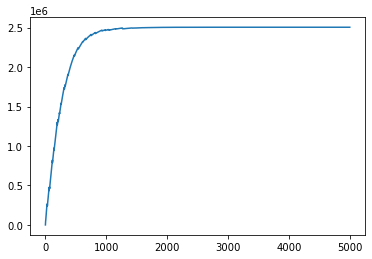

In [15]:
# Testing
current_state = node_counter
steps = [current_state]

while current_state not in term_nodes:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

In [16]:
for step in steps:
    for state in state_lookup:
        if state_lookup[state] == step:
            print(state)

level1_(1,)
level2_(1, 1)
level3_(1, 1, 1)
level4_(1, 1, 1, 1)
level5_(1, 1, 1, 1, 1)
level6_(1, 1, 1, 1, 1, 1)
level7_(1, 1, 1, 1, 1, 1, 1)
level8_(1, 1, 1, 1, 1, 1, 1, 0)
level9_(1, 1, 1, 1, 1, 1, 1, 0, 0)
level10_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0)
level11_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0)
level12_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0)
level13_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0)
level14_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0)
level15_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0)
level16_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
level17_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
level18_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
level19_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
level20_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1)
level21_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1)
level22_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1)
level23_(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 